<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

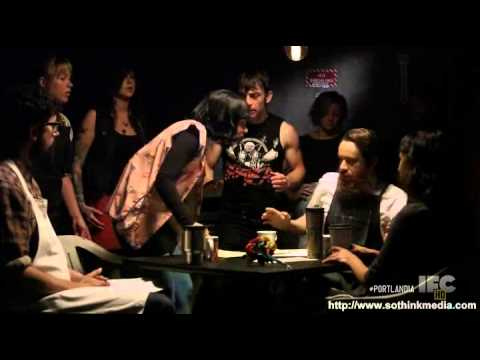

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [27]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [28]:
shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [29]:
import re
def tokenize(text):
    """
    Parses a string into a list of semnatic units(words)
    Args: 
        text(str): The string that the function will tokenize
    Returns:
        list: tokens parsed out by themechanics of your choice
    """
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    return tokens

In [30]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [31]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with..."


In [32]:
[shops['tokens'][i][0] for i in range(shops.shape[0])]

['11252016',
 '1222016',
 '11302016',
 '11252016',
 '1232016',
 '11202016',
 '10272016',
 '1122016',
 '10252016',
 '11102016',
 '10222016',
 '11202016',
 '11172016',
 '1252016',
 '11132016',
 '1192016',
 '1162016',
 '10252016',
 '10152016',
 '1212016',
 '10122016',
 '10102016',
 '10252016',
 '11162016',
 '11172016',
 '1222016',
 '1192016',
 '1222016',
 '1212016',
 '11112016',
 '1192016',
 '10132016',
 '11102016',
 '11232016',
 '10162016',
 '1072016',
 '1122016',
 '10152016',
 '10182016',
 '1222016',
 '11142016',
 '1072016',
 '11222016',
 '11212016',
 '11142016',
 '10132016',
 '1122016',
 '11302016',
 '11262016',
 '11122016',
 '10302016',
 '10292016',
 '10192016',
 '1062016',
 '11212016',
 '1072016',
 '10282016',
 '1092016',
 '11202016',
 '10162016',
 '1092016',
 '9142016',
 '542015',
 '5132015',
 '1112013',
 '4162013',
 '4232012',
 '11192012',
 '6252012',
 '2212014',
 '5212013',
 '7152016',
 '11172016',
 '9242016',
 '932016',
 '1152016',
 '1242016',
 '10182016',
 '9272016',
 '6302016',

In [33]:
for i in range(shops.shape[0]):
  shops['tokens'][i].remove(shops['tokens'][i][0])

In [34]:
shops['tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: tokens, dtype: object

In [21]:
shops['tokens'][0]

['1',
 'checkin',
 'love',
 'love',
 'loved',
 'the',
 'atmosphere',
 'every',
 'corner',
 'of',
 'the',
 'coffee',
 'shop',
 'had',
 'its',
 'own',
 'style',
 'and',
 'there',
 'were',
 'swings',
 'i',
 'ordered',
 'the',
 'matcha',
 'latte',
 'and',
 'it',
 'was',
 'muy',
 'fantastico',
 'ordering',
 'and',
 'getting',
 'my',
 'drink',
 'were',
 'pretty',
 'streamlined',
 'i',
 'ordered',
 'on',
 'an',
 'ipad',
 'which',
 'included',
 'all',
 'beverage',
 'selections',
 'that',
 'ranged',
 'from',
 'coffee',
 'to',
 'wine',
 'desired',
 'level',
 'of',
 'sweetness',
 'and',
 'a',
 'checkout',
 'system',
 'i',
 'got',
 'my',
 'latte',
 'within',
 'minutes',
 'i',
 'was',
 'hoping',
 'for',
 'a',
 'typical',
 'heart',
 'or',
 'feather',
 'on',
 'my',
 'latte',
 'but',
 'found',
 'myself',
 'listing',
 'out',
 'all',
 'the',
 'possibilities',
 'of',
 'what',
 'the',
 'art',
 'may',
 'be',
 'any',
 'ideas']

In [5]:
tokenize(shops['full_review_text'][0])

['11252016',
 '1',
 'checkin',
 'love',
 'love',
 'loved',
 'the',
 'atmosphere',
 'every',
 'corner',
 'of',
 'the',
 'coffee',
 'shop',
 'had',
 'its',
 'own',
 'style',
 'and',
 'there',
 'were',
 'swings',
 'i',
 'ordered',
 'the',
 'matcha',
 'latte',
 'and',
 'it',
 'was',
 'muy',
 'fantastico',
 'ordering',
 'and',
 'getting',
 'my',
 'drink',
 'were',
 'pretty',
 'streamlined',
 'i',
 'ordered',
 'on',
 'an',
 'ipad',
 'which',
 'included',
 'all',
 'beverage',
 'selections',
 'that',
 'ranged',
 'from',
 'coffee',
 'to',
 'wine',
 'desired',
 'level',
 'of',
 'sweetness',
 'and',
 'a',
 'checkout',
 'system',
 'i',
 'got',
 'my',
 'latte',
 'within',
 'minutes',
 'i',
 'was',
 'hoping',
 'for',
 'a',
 'typical',
 'heart',
 'or',
 'feather',
 'on',
 'my',
 'latte',
 'but',
 'found',
 'myself',
 'listing',
 'out',
 'all',
 'the',
 'possibilities',
 'of',
 'what',
 'the',
 'art',
 'may',
 'be',
 'any',
 'ideas']

In [39]:
#Object from Base Python
from collections import Counter
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()
# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))
# Print out the 10 most common words
word_counts.most_common(999999)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546),
 ('it', 9379),
 ('for', 8680),
 ('this', 6583),
 ('but', 6501),
 ('with', 6332),
 ('my', 6202),
 ('they', 6165),
 ('that', 6151),
 ('you', 5847),
 ('place', 5426),
 ('on', 5251),
 ('have', 5019),
 ('so', 4557),
 ('are', 4359),
 ('not', 4207),
 ('good', 3973),
 ('great', 3919),
 ('its', 3633),
 ('their', 3633),
 ('had', 3402),
 ('here', 3299),
 ('be', 3282),
 ('like', 3088),
 ('at', 3079),
 ('as', 3044),
 ('there', 2975),
 ('if', 2897),
 ('out', 2726),
 ('or', 2653),
 ('we', 2633),
 ('just', 2615),
 ('me', 2613),
 ('all', 2551),
 ('from', 2501),
 ('very', 2443),
 ('get', 2427),
 ('were', 2339),
 ('really', 2317),
 ('one', 2287),
 ('austin', 2252),
 ('1', 2232),
 ('some', 2068),
 ('also', 2008),
 ('back', 1987),
 ('checkin', 1966),
 ('love', 1935),
 ('can', 1916),
 ('up', 1886),
 ('an', 1885),
 ('time', 1884),
 ('im', 1861),
 (

In [40]:
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)
        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))
        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()
        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')
        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        return wc.sort_values(by='rank')

In [41]:
dr = count(shops['tokens'])

In [42]:
dr.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,the,6847,34809,1.0,0.044975,0.044975,0.899028
47,and,6864,26650,2.0,0.034433,0.079408,0.901261
46,a,6246,22755,3.0,0.029401,0.108809,0.820116
13,i,5528,20237,4.0,0.026147,0.134957,0.725840
4,to,5653,17164,5.0,0.022177,0.157133,0.742253


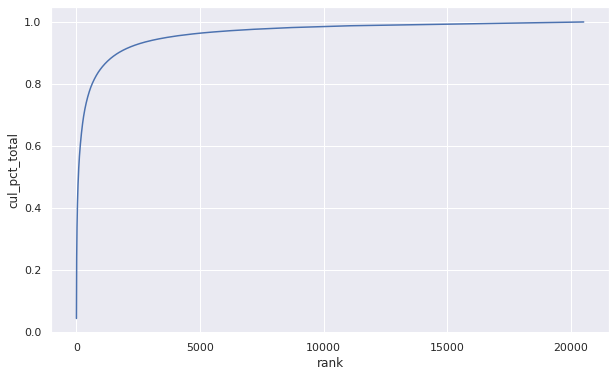

In [44]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=dr);

In [46]:
!pip install squarify

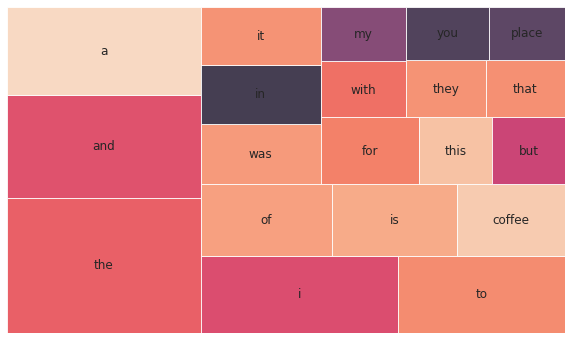

In [47]:
import squarify
import matplotlib.pyplot as plt
wc_top20 = dr[dr['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [48]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1, checkin, they, are, located, within, the, ..."


In [52]:
shops['new_rating'] = [float(shops['star_rating'][i].strip("star rating")) for i in range(len(shops['star_rating']))]

In [54]:
shops.drop(columns='star_rating', inplace=True)

In [55]:
shops.head()

,coffee_shop_name,full_review_text,tokens,new_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,"[1, checkin, love, love, loved, the, atmospher...",5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...","[listed, in, date, night, austin, ambiance, in...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,"[1, checkin, listed, in, brunch, spots, i, lov...",4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,"[very, cool, decor, good, drinks, nice, seatin...",2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,"[1, checkin, they, are, located, within, the, ...",4.0


In [58]:
condition = shops['new_rating'] >= 4.0

good = shops[condition]
bad = shops[~condition]

In [59]:
good.head()

,coffee_shop_name,full_review_text,tokens,new_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,"[1, checkin, love, love, loved, the, atmospher...",5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...","[listed, in, date, night, austin, ambiance, in...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,"[1, checkin, listed, in, brunch, spots, i, lov...",4.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,"[1, checkin, they, are, located, within, the, ...",4.0
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,"[1, checkin, very, cute, cafe, i, think, from,...",4.0


In [60]:
bad.head()

,coffee_shop_name,full_review_text,tokens,new_rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,"[very, cool, decor, good, drinks, nice, seatin...",2.0
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...","[1, checkin, ok, lets, try, this, approach, pr...",3.0
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...","[the, store, has, a, decoration, but, honestly...",3.0
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,"[1, checkin, listed, in, 2016, the, third, tim...",3.0
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...","[okay, so, after, visiting, my, friends, in, l...",1.0


In [62]:
print(good.shape)
print(bad.shape)

(6140, 4)
(1476, 4)


In [63]:
dg = count(good['tokens'])
db = count(bad['tokens'])

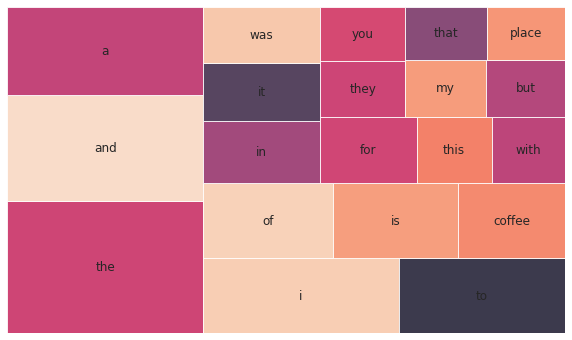

In [64]:
import squarify
import matplotlib.pyplot as plt
wc_top20 = dg[dg['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

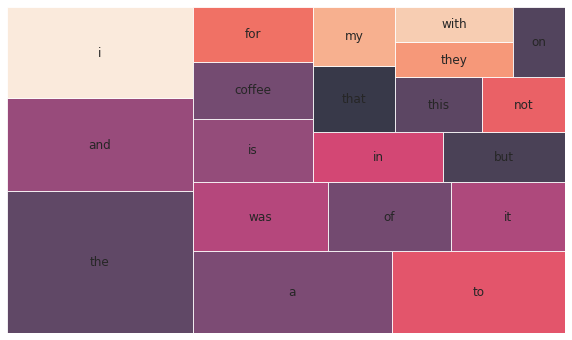

In [65]:
import squarify
import matplotlib.pyplot as plt
wc_top20 = db[db['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

